In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
# No Missing Values in the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


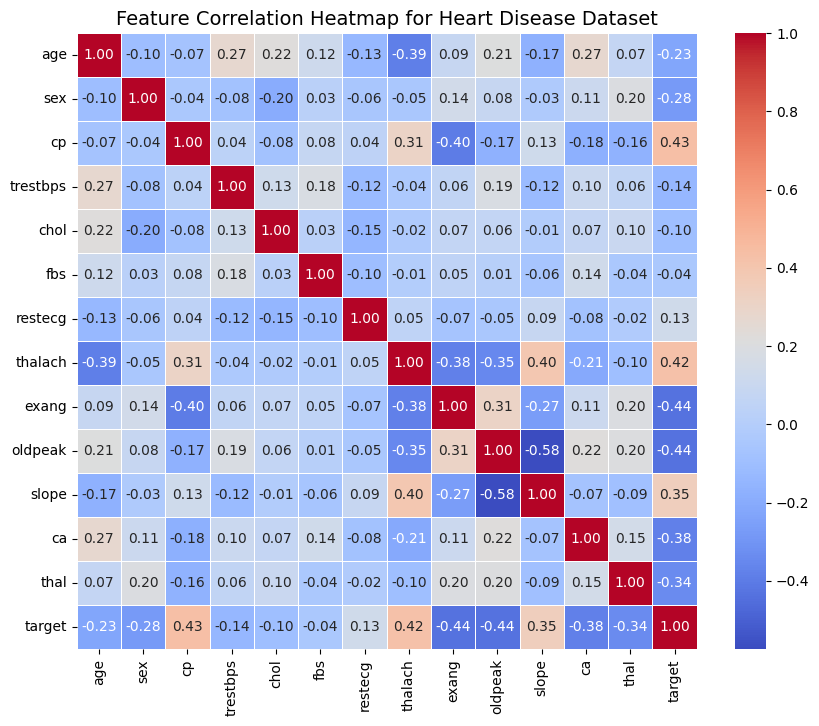

In [7]:
# Compute the correlation matrix
corr = df.corr()

# Plote the correlation matrix in a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap for Heart Disease Dataset", fontsize=14)
plt.show()

In [8]:
# Find the count of people that have a heart disease in our dataset
df.target.value_counts()

,count
target,
1,526
0,499


# ***Males typically have a higher risk of heart disease at younger ages, though risk for females rises after menopause.***

In [9]:
# Crosstab between sex and target
sex_target = pd.crosstab(df['sex'], df["target"])
print(sex_target)

target    0    1
sex             
0        86  226
1       413  300


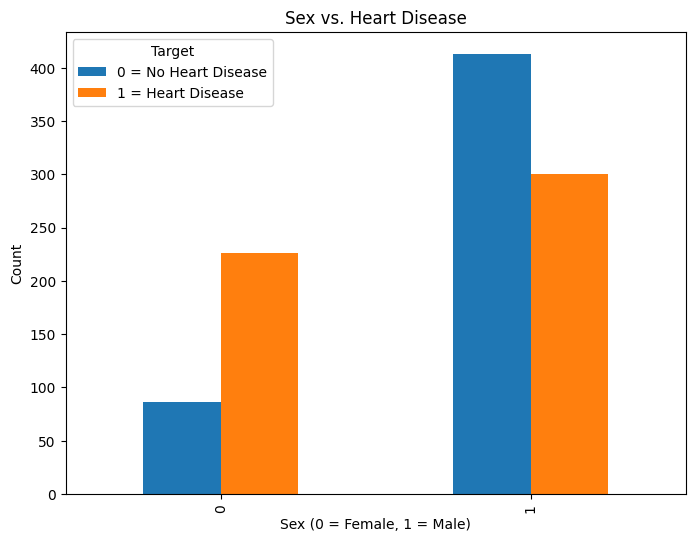

In [10]:
# Plot Grouped bar chart
sex_target.plot(kind='bar', figsize=(8,6))
plt.title('Sex vs. Heart Disease')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(['0 = No Heart Disease', '1 = Heart Disease'], title="Target")
plt.show()

### *    The visualization shows that men are more likely to develop heart disease at younger ages, while women’s risk increases significantly after menopause (around 50 years and older).
### *  This highlights a gender-related pattern where early-age heart disease is more common in men, but post-menopause, women’s probability of heart disease rises sharply.

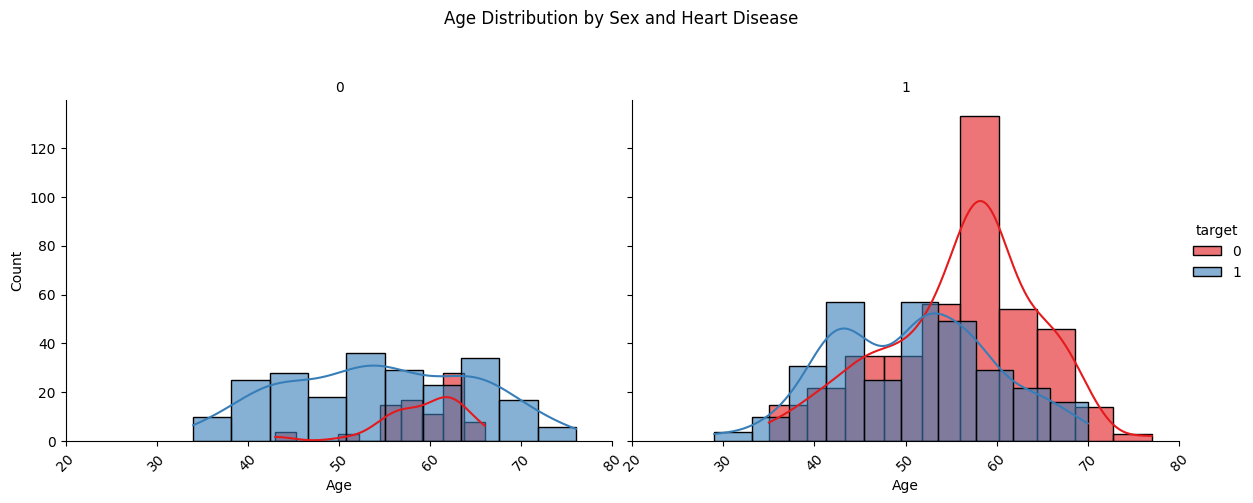

In [11]:
g = sns.FacetGrid(df, col="sex", hue="target", height=5, aspect=1.2, palette="Set1")
g.map(sns.histplot, "age", bins=10, kde=True, alpha=0.6)
g.add_legend()
g.set_axis_labels("Age", "Count")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Age Distribution by Sex and Heart Disease")
plt.show()

# ***Chest pain is one of the strongest early indicators of heart problems.***

0 = typical angina (chest pain linked to decreased blood flow to the heart)

1 = atypical angina (chest pain not directly related to heart disease)

2 = non-anginal pain (chest pain not likely related to the heart)

3 = asymptomatic (no chest pain)

In [12]:
# Crosstab between chest pain type and target
cp_target = pd.crosstab(df['cp'], df['target'])
print(cp_target)

target    0    1
cp              
0       375  122
1        33  134
2        65  219
3        26   51


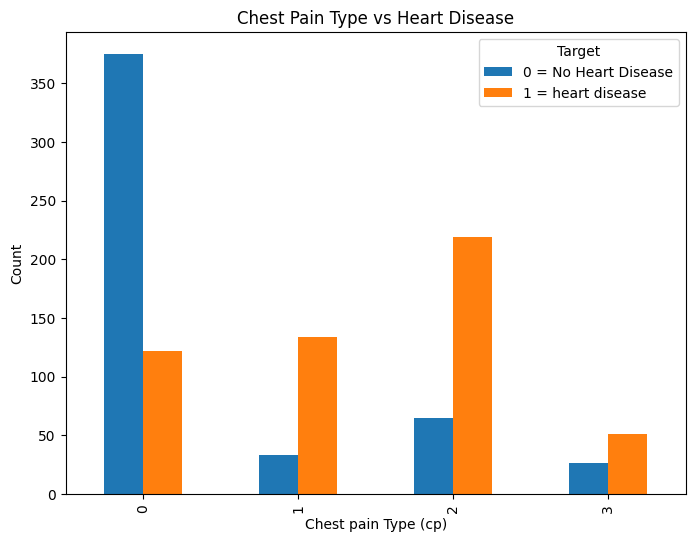

In [13]:
# Plot Grouped bar chart
cp_target.plot(kind='bar', figsize=(8, 6))
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest pain Type (cp)')
plt.ylabel('Count')
plt.legend(['0 = No Heart Disease', '1 = heart disease'], title = 'Target')
plt.show()

# ***Fasting Blood Pressure***

# A fasting blood sugar > 120 mg/dL is a medical flag. It suggests impaired glucose tolerance or diabetes.

# Diabetes is a major risk factor for heart disease, since high blood sugar damages blood vessels over time and accelerates atherosclerosis (plaque buildup in arteries).

In [14]:
# Crosstab between Fasting Blood Pressure and target
fbs_target = pd.crosstab(df.fbs, df.target)
print(fbs_target)

target    0    1
fbs             
0       417  455
1        82   71


# ***Fasting Blood Pressure***

### *   The visualization does not show a strong relationship between fasting blood sugar and heart disease in this dataset. However, based on domain knowledge, we know that a fasting blood sugar > 120 mg/dL is a medical flag for impaired glucose tolerance or diabetes, which is a major risk factor for heart disease.

### *   This highlights that while the dataset may not reflect a clear correlation, medical evidence confirms the importance of this feature in cardiovascular risk assessment.

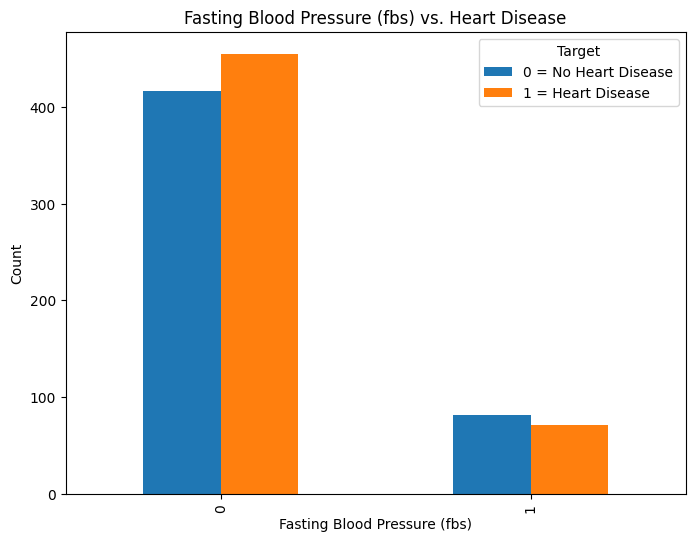

In [15]:
# Plot Grouped bar chart
fbs_target.plot(kind='bar', figsize=(8,6))
plt.title('Fasting Blood Pressure (fbs) vs. Heart Disease')
plt.xlabel('Fasting Blood Pressure (fbs)')
plt.ylabel('Count')
plt.legend(['0 = No Heart Disease', '1 = Heart Disease'], title="Target")
plt.show()

# ***Maximum Heart Rate Achieved During Exercise***


### *   Low maximum heart rate (much lower than predicted for age) may indicate the heart isn’t pumping effectively under stress → possible cardiovascular disease.

### *  Very high or abnormal responses may also suggest heart rhythm issues.


/tmp/ipython-input-2761006374.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y="thalach", data=df, palette="Set2")


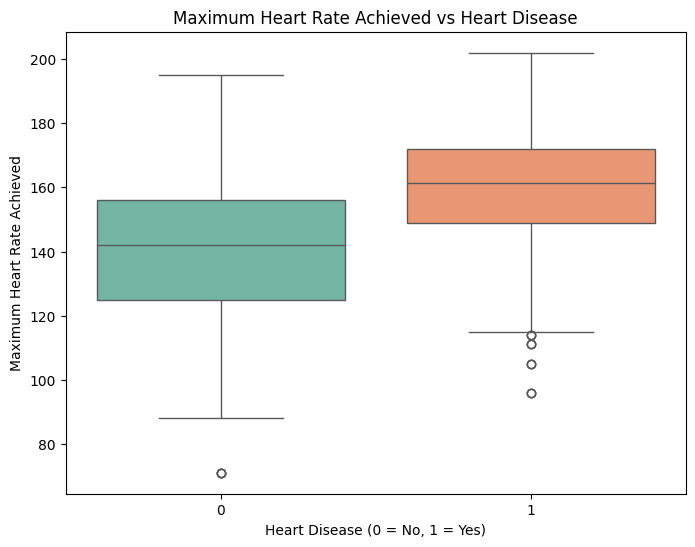

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x="target", y="thalach", data=df, palette="Set2")
plt.title("Maximum Heart Rate Achieved vs Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Maximum Heart Rate Achieved")
plt.show()

# ***Resting Blood Pressure***


### * A large number of patients with normal blood pressure (<120 mmHg) still have heart disease, which indicates that blood pressure alone is not a sufficient predictor.
### *   In the Hypertension Stage 1 range (130–139 mmHg), the proportion of patients with heart disease is higher than those without, showing that elevated resting blood pressure contributes to risk.

### *  At higher stages (140–179 mmHg), heart disease is still present, but the distribution between disease and no disease is more balanced.
### *  Interestingly, very few patients fall into the Crisis range (≥180 mmHg), and most of them do not show heart disease in this dataset — likely due to small sample size.



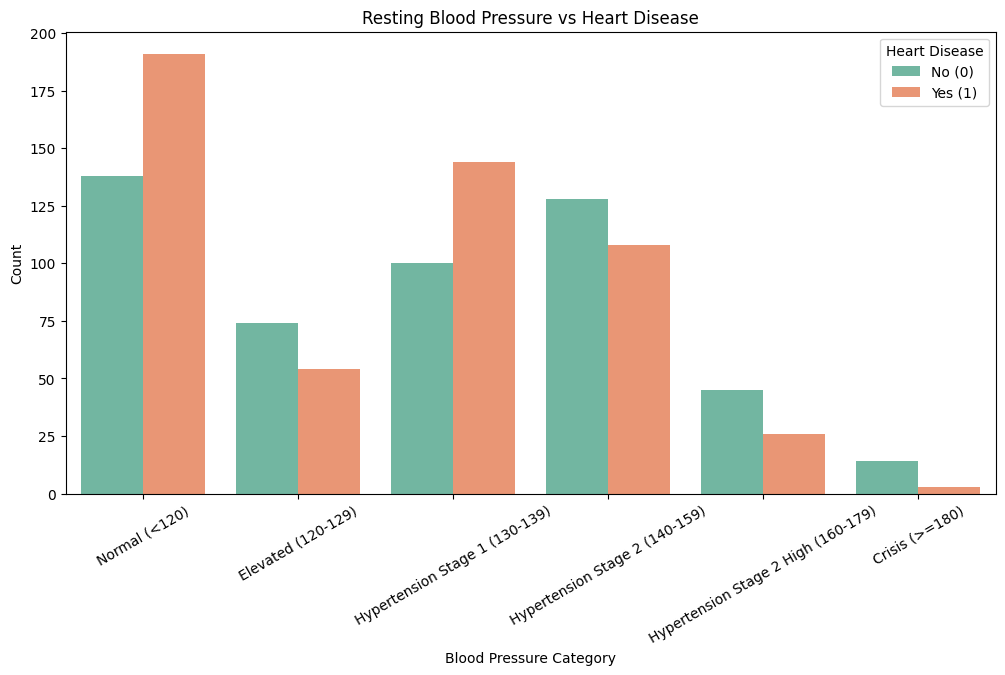

In [17]:
# Create blood pressure categories
bins = [0, 120, 129, 139, 159, 179, 300]
labels = ["Normal (<120)", "Elevated (120-129)",
          "Hypertension Stage 1 (130-139)",
          "Hypertension Stage 2 (140-159)",
          "Hypertension Stage 2 High (160-179)",
          "Crisis (>=180)"]

df["bp_category"] = pd.cut(df["trestbps"], bins=bins, labels=labels, right=True)

# Plot countplot
plt.figure(figsize=(12,6))
sns.countplot(x="bp_category", hue="target", data=df, palette="Set2")
plt.title("Resting Blood Pressure vs Heart Disease")
plt.xlabel("Blood Pressure Category")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.legend(title="Heart Disease", labels=["No (0)", "Yes (1)"])
plt.show()

In [18]:
pd.crosstab(df['exang'], df['target'])

target,0,1
exang,,
0,225,455
1,274,71


# ***Contrary to medical expectations, this dataset shows that:***

### *   Exercise-induced angina is not the strongest predictor of heart disease here and we can see this at the correlation Matrix.
### *   Instead, many heart disease patients are in the non-angina group (exang = 0), suggesting that other factors (cholesterol, resting ECG, age, max heart rate, etc.) play a bigger role in predicting heart disease in this dataset.

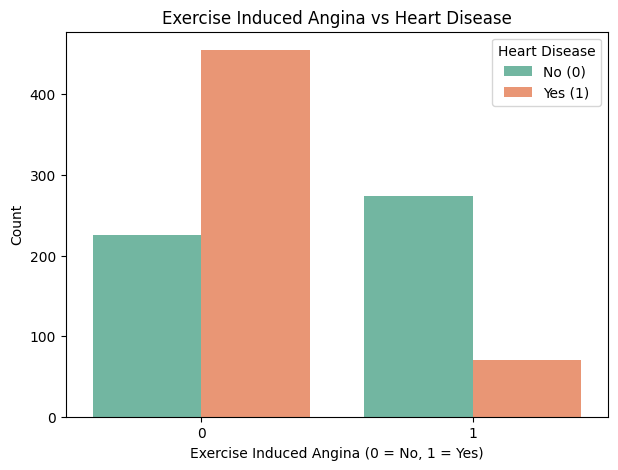

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(x="exang", hue="target", data=df, palette="Set2")
plt.title("Exercise Induced Angina vs Heart Disease")
plt.xlabel("Exercise Induced Angina (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No (0)", "Yes (1)"])
plt.show()

In [20]:
# Crosstab between number of major vessels colored by flourosopy and target
ca_target = pd.crosstab(df.ca, df.target)
print(ca_target)

target    0    1
ca              
0       163  415
1       160   66
2       113   21
3        60    9
4         3   15


# ***Numberof Major Vessels Colored by Flourosopy***


### *   The visualization of number of vessels (ca) vs. heart disease (target) shows that heart disease prevalence is highest when ca = 0, and decreases as the number of vessels increases.


### *   While this may seem counterintuitive medically (as more diseased vessels typically mean more severe heart disease), in this dataset, ca reflects the number of vessels colored by fluoroscopy, not necessarily the number of blocked vessels. Thus, ca = 0 may indicate poorer visibility of blood flow, which strongly correlates with the presence of heart disease.

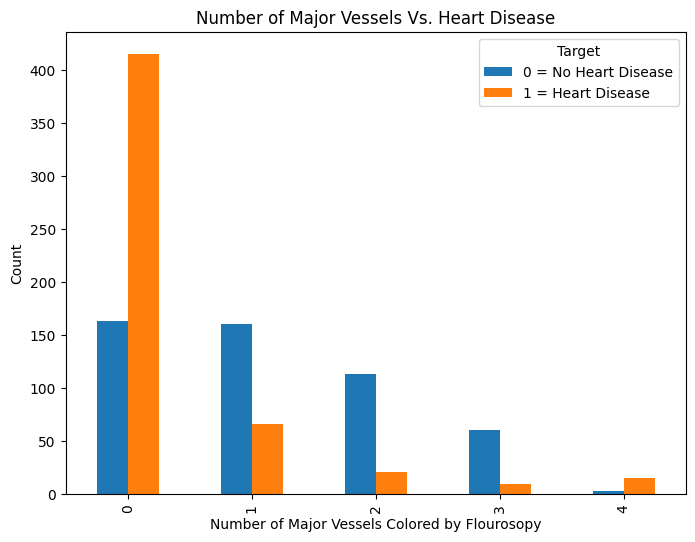

In [21]:
# Plot Grouped bar chart
ca_target.plot(kind='bar', figsize=(8,6))
plt.title('Number of Major Vessels Vs. Heart Disease')
plt.xlabel('Number of Major Vessels Colored by Flourosopy')
plt.ylabel('Count')
plt.legend(['0 = No Heart Disease', '1 = Heart Disease'], title="Target")
plt.show()

# ***Resting Electrocardiographic Results (restecg)***

## This feature records the result of the resting ECG test (ECG taken while the patient is not exercising).

## It’s encoded into 3 categories:

### 1.   0 = Normal

*   The ECG shows a normal heart rhythm and no visible abnormalities.
*   Usually means lower risk, but doesn’t rule out disease.

### 2.   1 = ST-T wave abnormality

*   The ST segment and T wave on the ECG look unusual.
*   Strong indicator of potential Heart Disease
*   These abnormalities often suggest:

        a-Ischemia (reduced blood flow to the heart)

        b-Myocardial infarction (heart attack, past or ongoing)

        c-Electrolyte imbalances (like low potassium)


### 3.   2 = Left ventricular hypertrophy (LVH)

*   This means the left ventricle (the heart’s main pumping chamber) is enlarged.
*   LVH increases the risk of heart failure and arrhythmias


In [22]:
restecg_target = pd.crosstab(df.restecg, df.target)
print(restecg_target)

target     0    1
restecg          
0        283  214
1        204  309
2         12    3


# ***Resting Electrocardiographic Results (restecg) Visualization***
### *   ST–T wave abnormalities (category 1) are classic signs of ischemia (reduced blood flow to the heart) or a prior heart attack.
### *   This makes sense medically: people with these abnormalities are at much higher risk of heart disease.
### *   Normal ECG (category 0) doesn’t guarantee absence of disease — some patients still had heart disease despite a normal resting ECG.
### *   LVH (category 2) is a risk factor, but in this dataset it appears less often, so its predictive weight may look smaller.



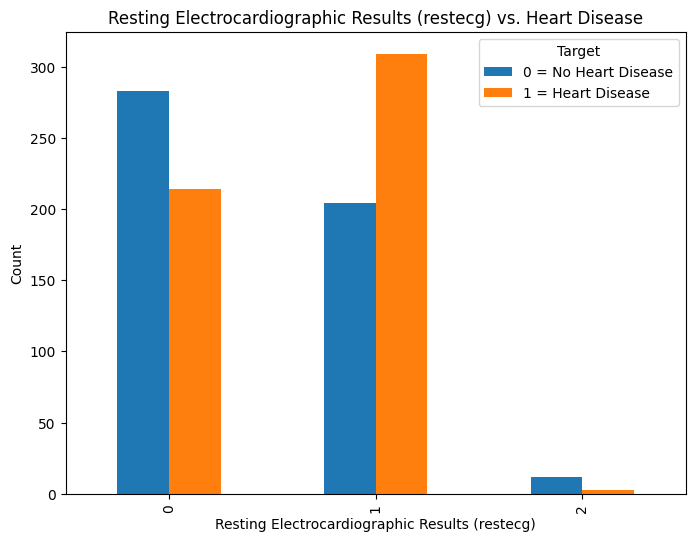

In [23]:
# Plot Grouped bar chart
restecg_target.plot(kind='bar', figsize=(8,6))
plt.title('Resting Electrocardiographic Results (restecg) vs. Heart Disease')
plt.xlabel('Resting Electrocardiographic Results (restecg)')
plt.ylabel('Count')
plt.legend(['0 = No Heart Disease', '1 = Heart Disease'], title="Target")
plt.show()

# ***The slope***

## This feature tells us the slope (trend) of the ST segment at peak exercise:

1.   0 = Upsloping


*   The ST segment goes upward.
*   Usually considered normal during exercise.
*   Indicates that the heart is tolerating exercise stress well.


2.  1 = Flat


*   The ST segment is flat.
*   This can be abnormal and often indicates some restriction of blood flow.
*   May point toward ischemia (reduced oxygen supply to the heart).


3.  2 = Downsloping


*  The ST segment slopes downward after exercise.
*  This is the most concerning pattern.
*  Strongly associated with coronary artery disease and poor prognosis.



In [24]:
#  Crosstab between the Slope and target
slope_target = pd.crosstab(df.slope, df.target)
print(slope_target)

target    0    1
slope           
0        46   28
1       324  158
2       129  340


# ***Slope Visualization***

### *    The visualization of slope vs. target shows that patients with a downsloping ST slope (category 2) have the highest number of heart disease cases, which matches clinical knowledge that downsloping ST segments are strongly associated with ischemia and coronary artery disease. Patients with a flat slope (category 1) also show a considerable number of disease cases, while those with an upsloping ST slope (category 0) have the lowest number, reflecting a more normal and healthy response to exercise.




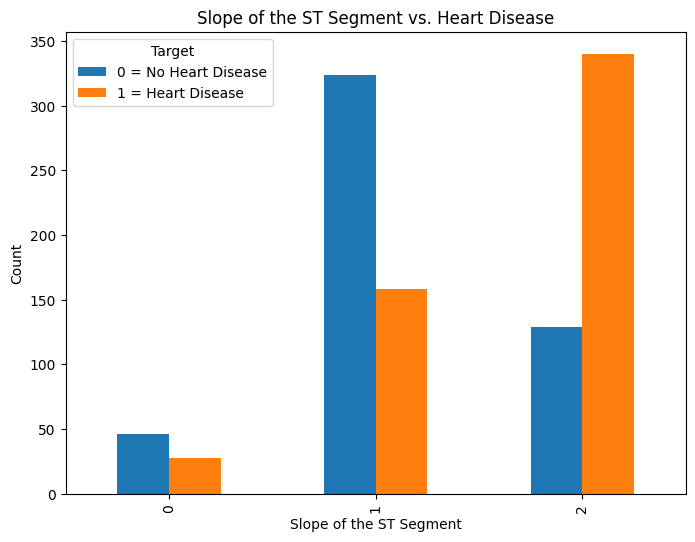

In [25]:
# Plot Grouped bar chart
slope_target.plot(kind='bar', figsize=(8,6))
plt.title('Slope of the ST Segment vs. Heart Disease')
plt.xlabel('Slope of the ST Segment')
plt.ylabel('Count')
plt.legend(['0 = No Heart Disease', '1 = Heart Disease'], title="Target")
plt.show()